In [1]:
import pandas as pd
import numpy as np
from scipy import stats as sp
import sys, os
sys.path.append('../')
import trace_analysis
import plots_analysis
import trace_statistics

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# SVM
from sklearn import svm

# Data Preparation


Prepare the data to be used with kNN

In [2]:
plots = [(os.getcwd() + '/traces/', '2019-01JAN-30-1'), 
         (os.getcwd() + '/traces/', '2019-01JAN-30-2'),
         (os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185'),
         (os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182'),
         (os.getcwd() + '/traces/', '2019-01JAN-30-1b169')]
stats = None
prova = []

for row in plots:
    label = 'Normal'
    
    # Assign a label
    if row[1].find('b1') >= 0:
        label = 'Black Hole'
    nodes, packets_node = trace_analysis.process_iotlab_node_by_node2(row[0], row[1])
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, packets_node, label)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, packets_node, label)])
    
        
stats = stats.reset_index(drop=True)
stats.head(5)

,node_id,count,mean,var,std,hop,min,max,loss,label
0,m3-105,59,43.042797,181.467597,13.470991,2,16.777,77.839,0.295,Normal
1,m3-113,79,29.980405,107.075913,10.347749,2,2.067,66.558,0.395,Normal
2,m3-118,51,33.125137,124.648678,11.164617,2,2.231,75.869,0.255,Normal
3,m3-126,50,35.585940,154.354729,12.423958,2,2.449,68.431,0.250,Normal
4,m3-129,124,25.474363,60.216378,7.759921,2,15.382,69.188,0.620,Normal


Select the set of features and labels that we use to fit the algorithm

In [3]:
# separate features from target values
features = stats.drop(columns=['node_id', 'label'])
target = stats['label'].values
print('Targets: ' + str(set(target)))

# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

Targets: {'Black Hole', 'Normal'}


# K-Nearest Neighbor (KNN) Classification

Let us first observe the accuracies for different values of k

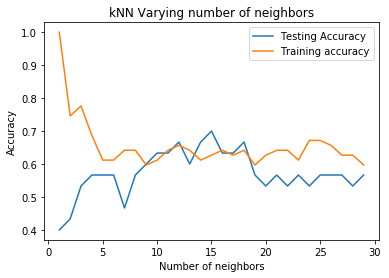

In [4]:
trace_analysis.knn_test_number_of_neighbors(X_train, X_test, y_train, y_test)

Let's build KNN classifier 

In [6]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("\n\n",classification_report(y_test,y_pred))


Accuracy: 0.7


               precision    recall  f1-score   support

  Black Hole       0.75      0.79      0.77        19
      Normal       0.60      0.55      0.57        11

   micro avg       0.70      0.70      0.70        30
   macro avg       0.68      0.67      0.67        30
weighted avg       0.70      0.70      0.70        30



# Support Vector Machines (SVM) Classification

Let us first observe the accuracies for different values of k

In [17]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear', random_state=9, gamma='scale') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("\n\n",classification_report(y_test,y_pred))

Accuracy: 0.7666666666666667


               precision    recall  f1-score   support

  Black Hole       0.83      0.79      0.81        19
      Normal       0.67      0.73      0.70        11

   micro avg       0.77      0.77      0.77        30
   macro avg       0.75      0.76      0.75        30
weighted avg       0.77      0.77      0.77        30

